In [38]:
# reduce complexity of model
# use relu activation function in hidden layers

In [52]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [53]:
x ,y = make_moons(n_samples = 200 , noise =0.3 , random_state =10)

In [54]:
print(x.shape , y.shape)

(200, 2) (200,)


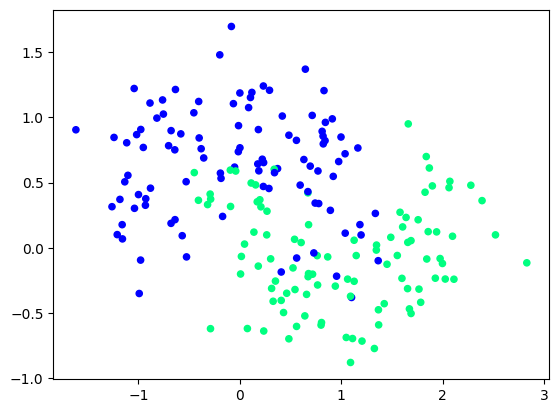

In [55]:
plt.scatter(x[: ,0] , x[: , 1] , c= y , cmap = 'winter' , s = 20)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [57]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [58]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [59]:
model = Sequential()
model.add(Dense(28 , activation='relu' , input_dim = 2))
model.add(Dense(10 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [60]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [61]:
old_weight = model.get_weights()[0]
print(old_weight)

[[-4.0800622e-01  5.9146583e-02 -2.4117534e-01  4.4406629e-01
   2.0242697e-01  1.8072891e-01 -8.8196188e-02  2.8408253e-01
   2.9248476e-02  3.1493062e-01  9.2478335e-02  3.1048059e-04
   1.3307565e-01 -1.7501864e-01 -3.6593378e-03  2.7090001e-01
  -2.3256908e-01 -3.8385791e-01 -5.7736695e-02  3.0350804e-01
  -1.3802394e-01 -3.5484710e-01 -8.2219809e-02 -4.0500635e-01
  -3.3309421e-01  1.2403554e-01  3.6508334e-01  4.2286694e-01]
 [-3.9241165e-02  3.0071169e-02 -4.0985262e-01 -2.5451136e-01
   4.3022281e-01 -4.4345841e-01 -2.9815376e-02  2.9847711e-01
   3.8358551e-01 -1.4421263e-01 -9.6272230e-02  2.9025078e-03
   2.8134406e-01 -1.0145405e-01  1.3698447e-01  9.7256124e-02
  -2.0902425e-01  1.7353714e-02  3.4206885e-01  3.7113321e-01
  -1.9446582e-01  2.8585690e-01 -2.1899658e-01 -3.7701094e-01
   1.2696552e-01  7.9771519e-02  3.9011592e-01  3.6256266e-01]]


In [62]:
history = model.fit(x_train_scaled , y_train ,epochs = 100 , validation_split = 0.2)

Epoch 1/100
4/4 [==============================] - 1s 58ms/step - loss: 0.7005 - accuracy: 0.6406 - val_loss: 0.7464 - val_accuracy: 0.5625
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6831 - accuracy: 0.7344 - val_loss: 0.7302 - val_accuracy: 0.6562
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6689 - accuracy: 0.7578 - val_loss: 0.7143 - val_accuracy: 0.6562
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6554 - accuracy: 0.7734 - val_loss: 0.6997 - val_accuracy: 0.6875
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6426 - accuracy: 0.8047 - val_loss: 0.6864 - val_accuracy: 0.6875
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6310 - accuracy: 0.8047 - val_loss: 0.6743 - val_accuracy: 0.6875
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6201 - accuracy: 0.8047 - val_loss: 0.6626 - val_accuracy: 0.6875
Epoch 8/100
4/4 [====

In [63]:
new_weight = model.get_weights()[0]
print(100*((new_weight - old_weight)/old_weight))

[[ 2.50365849e+01  2.35315781e+02 -5.52160454e+01  2.56436729e+01
   4.17708244e+01  8.74779358e+01  2.17300583e+02  4.49131737e+01
  -4.89638031e+02  9.84306526e+00  5.50704956e+01 -2.65204141e+04
   1.04589096e+02 -3.61836052e+01  2.87570312e+03  1.43621893e+01
  -2.06864643e+01 -7.26698208e+00  2.93164856e+02 -1.53584137e+01
  -1.13249123e+02 -3.25487518e+01  8.29448013e+01 -2.49319458e+01
   4.97402153e+01  1.32796616e+02  4.70513535e+01 -1.58655825e+01]
 [ 7.41434326e+01 -3.34526367e+02  2.77723274e+01  4.87164841e+01
   2.96453247e+01  3.59609070e+01 -1.03353096e+02 -3.71399841e+01
   3.58863029e+01  1.07578041e+02  1.17023018e+02  4.02372217e+03
  -4.40302925e+01  1.02050652e+02  8.27146683e+01  1.07629097e+02
   5.72866096e+01 -1.89997467e+02  4.62225494e+01  4.14177132e+01
   4.64644394e+01 -2.00114193e+01 -2.65021019e+01  1.79123039e+01
   1.93817535e+02 -2.11883575e+02 -3.43210144e+01  5.04239960e+01]]


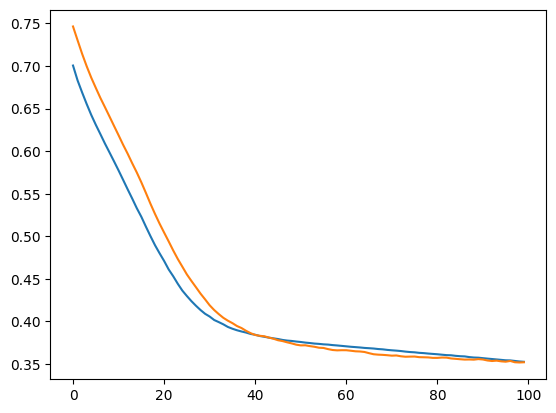

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])